***
< [Home](https://github.com/SeanOhAileasa) | [README](https://github.com/SeanOhAileasa/nkp-network-concepts/blob/main/README.md) >

## CompTIA Network+ - Course Material 2022
### Topic: ``Network Addressing``
***

Course material for the ``CompTIA Network+`` module of the ``ICT Associate Apprenticeship (Cybersecurity)`` programme.

<a id="top"></a>
***
## Table of Contents
***

<a id="topAdvancedNetworking"></a>
### [Networking Addressing](#networkConcepts)

- [DHCPv6](#networkConceptsAssigningIPv6Addresses) <br/><br/>
    - Stateful Dynamic Host Configuration Protocol Version 6 (DHCPv6) <br/><br/>
        - IPv6 Interface Configuration [``!=`` Broadcasts] <br/><br/>
            - Link-Local ADDR [Automatic] <br/><br/>
                - ``fE80`` <br/><br/>
            - Multicast <br/><br/>
                - Client ``udp/546`` <br/><br/>
                - Server ``udp/547`` <br/><br/>
        - DHCPv6 Steps <br/><br/>
            - Client ``fe80:aabb:ccff:fedd:eeff`` <br/><br/>                           
                - i. DHCPv6 Solicit Message <br/><br/>
                    - Multicast ADDR <br/><br/>
                        - ``udp/547`` [Server] <br/><br/>
                            - ``[ff02::1:2]:547`` <br/><br/>
                                - DHCP Server [Seek] <br/><br/>
            - Server ``fe80::0011:22ff:fe33:5566`` <br/><br/>
                - ii. DHCPv6 Advertise Message <br/><br/>
                    - ``udp/546`` [Client] <br/><br/> 
                        - Associated IP ADDR <br/><br/>
            - Client <br/><br/>
                - List All Adverticement [DHCP Servers] <br/><br/>
                    - iii. DHCPv6 Request Message <br/><br/>
                        - Multicast ADDR <br/><br/>
                            - ``udp/547`` [Server] <br/><br/>
                                - ``[ff02::1:2]:547`` <br/><br/>
                                    - Picks x1 <br/><br/>
            - Server <br/><br/>
                - iv. DHCPv6 Reply Message <br/><br/>
                    - ``udp/546`` [Client] <br/><br/>
                        - Client Configures IP ADDR Assigned <br/><br/>

- [IPv6 Prefix - Modified MAC](#networkConceptsAssigningIPv6AddressesOther) <br/><br/>
    - Static IP [ADDR Never Changes] <br/><br/>
        - Media Access Control - MAC [ADDR Never Changes] <br/><br/>
            - Physical Address [Network Interface Card - Ethernet Network] <br/><br/>
                - ``EUI-48`` ADDR [Extended Unique Identifier] <br/><br/>
                    - ``48-bit`` [MAC ADDR] <br/><br/>
                        - Organizationally Unique Identifer (OUI) <br/><br/>
                            - Manufacturer <br/><br/>
                                - ``24-bit`` <br/><br/>
                        - Network Interface Controller-Specific <br/><br/>
                            - Serial Number <br/><br/>
                                - ``24-bit`` <br/><br/>
    - Modify MAC ADDR [Create Static IPv6 ADDR] <br/><br/>
        - Extended Unique Identifier - EUI ADDR <br/><br/>
            - ``64-bit`` <br/><br/>
                - MAC ADDR <br/><br/>
                    - ``48-bit`` [Create ``64-bit`` EUI ADDR] <br/><br/>
        - Converting EUI-48 TO EUI-64 <br/><br/>
            - Modifying MAC <br/><br/>
                - Split ``24-bit`` <br/><br/>
                    - Insert Middle ``16-bit`` <br/><br/>
                        - ``FFFE`` <br/><br/>
                - Change Original MAC ADDR ``8c2d:aa`` <br/><br/>
                    - Modify Seventh Bit <br/><br/>
                        - Burned-in ADDR - BIA <br/><br/>
                            - Locally Administered ADDR ``U/L`` [Universal / Local] <br/><br/>
                                - ``0`` to ``1`` [``8e2d:aa``] <br/><br/>
    - Build IPv6 ADDR <br/><br/> 
        - Routers [Local Subnet] <br/><br/>
            - Send Neighbour Discovery Protocol - NDP <br/><br/>
                - IPv6 Subnet Prefix ``2600:dddd:1111:0001`` <br/><br/>
                    - ``64-bit`` <br/><br/>
        - EUI-64 ADDR [Remaining ``64-bit``] <br/><br/>
            - ``3-byte`` MAC <br/><br/>
                - Modified MAC ADDR ``8e2d:aa`` <br/><br/>
            - ``2-byte`` <br/><br/>
                - ``FFFE`` <br/><br/>
            - ``3-byte`` MAC [Unchanged Remaining] <br/><br/>

- [Converting EUI-48 TO EUI-64 - Flipping the 7th bit](#ConvertingEUI48TOEUI64Flippingthe7thbit) <br/><br/>

<hr width=50%;>

< [Table of Contents](#top) | [References](#references) >
<a id="networkConcepts"></a>
***
### Networking Addressing
***

< [Table of Contents](#top) | [References](#references) >
<a id="networkConceptsAssigningIPv6Addresses"></a>
***
###### DHCPv6
***

Just like with IPv4, we can use Dynamic Host Configuration Protocol (DHCP) in IPv6. 

Often used to configure devices with a global IP address that can be used to communicate out to the internet.

With IPv6, every device has already been assigned a link-local address.

These link-local addresses all start with ``fE80``, and every interface that is configured for IPv6 will automatically have a link-local address associated with it. 

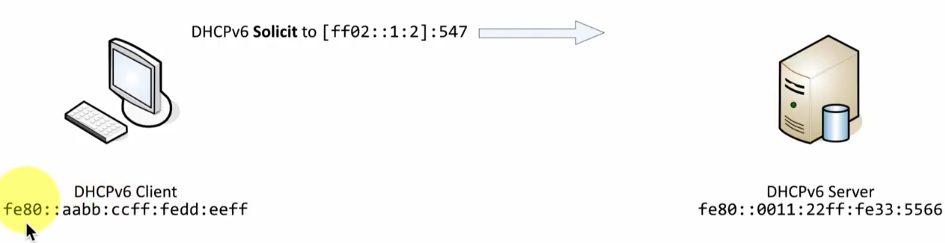

Given there exists an IP address that we can use to communicate locally, we don't need to send this information out using broadcasts. 

This DHCP communication can be sent with multicast and it uses ``UDP`` port ``546`` (Client) and ``UDP`` port ``547`` (Server) to communicate. 

```python
udp/546 # Client
udp/547 # Server
```

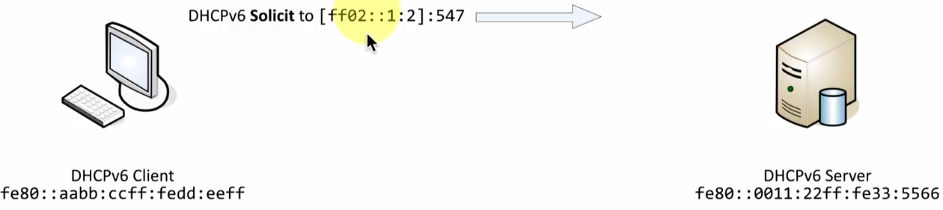

Like IPv4, the DHCP and IPv6 uses four different steps to be able to accomplish this process.

i. A DHCPv6 ``Solicit`` message to a multicast address and a particular UDP port looking for DHCP servers. 

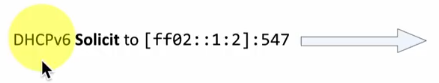

On this subnet, have a DHCP server that will receive that multicast and respond back with a DHCPv6 ``Advertise`` message with an associated IP address. 

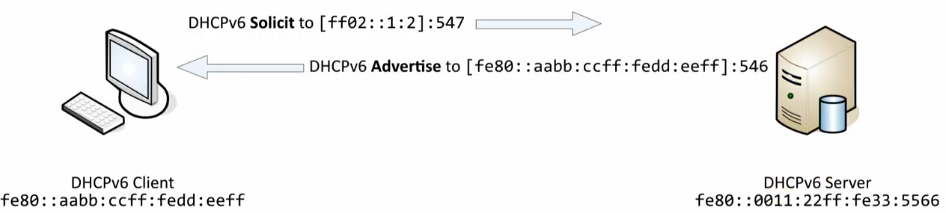

The DHCP client will receive the list of all of the different advertisements from all of the DHCP servers on that subnet, it will choose one of them and then send back a DHCPv6 ``Request`` message. 

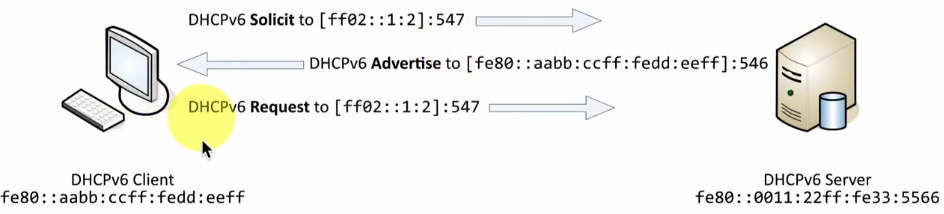

The DHCP server will then respond with a DHCPv6 ``Reply`` message, at which point that workstation will configure itself with the IPv6 address that was assigned by the DHCP server.

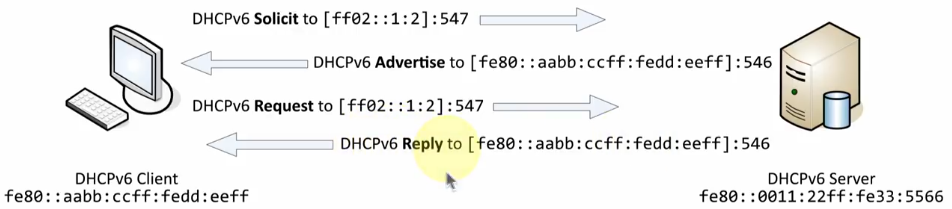

< [Table of Contents](#top) | [References](#references) >
<a id="networkConceptsAssigningIPv6AddressesOther"></a>
***
###### IPv6 Prefix - Modified MAC
***

There are other ways to assign IP addresses with IPv6. 

This method is one that would allow all devices on the network to automatically configure themselves with a static IPv6 address that can be used to communicate worldwide.

The process is based on the other address that never changes, which is the MAC address of the network interface card (NIC). 

Going to modify this MAC address to create a static IPv6 address.

This type of address being created is using an ``EUI-64`` (stands for Extended Unique Identifier) and is a ``64-bit`` value. 

There is a difference between a MAC address and a ``64-bit`` EUI address - the MAC address is ``48-bits`` long. 

Need ``64`` bits to be able to create the static IPv6 address - going to need some extra bits to use for this particular static IP address. 

Using that MAC address, making a minor change to it.

Taking the ``48-bit`` MAC address and creating from it a ``64-bit`` EUI.

The Media Access Control (MAC) is the physical address that's associated with a Network Interface Card (NIC) on an Ethernet network.

Sometimes referred to as an ``EUI-48`` address associated with the ``48-bits`` of the MAC address.

There are also two halves to the MAC address. 

The first three bytes (``24-bit``) are the ``OUI``, or Organizationally Unique Identifier, which tells who manufactured this particular NIC.

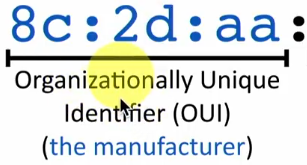

The last three bytes (``24-bit``) will be unique to your NIC.

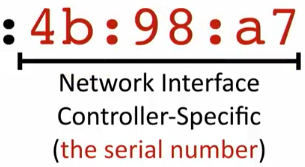

Combined together (the Organizationally Unique Identifier - OUI and Network Interface Controller-Specific), no other device on the network will have exactly this same MAC address. 

To create this ``EUI-64`` from this ``48-bit`` MAC address:

i. Going to split the MAC address into two pieces - will be ``24-bit`` halves (3-bytes).

ii. In the middle, insert ``16`` additional bits (the missing 16 bits), these will specifically be ``FFFE`` that will go into the middle of this address.

iii. Then we have to make a change to the original MAC address. 

- The seventh bit that needs to be modified. 

- This changes the address from being one that's a burned-in address (BIA) to something that is a locally administered address. 

- This is called the ``U/L`` (``Universal/Local``) bit that changes it from universal to locally administered. 

Changing that seventh bit, going to be in the first byte of the MAC address.

If the MAC address starts with ``8c``, we need to list out that ``8c`` into binary.

```python
 0 0000
 1 0001
 2 0010
 3 0011
 4 0100
 5 0101
 6 0110
 7 0111
 8 1000
 9 1001
 A 1010
 B 1011
 C 1100
 D 1101
 E 1110
 F 1111
```

That seventh bit is a ``0``, need to change that ``0`` to a ``1`` and that will be represented as ``8e`` when converted back into hexadecimal form. 

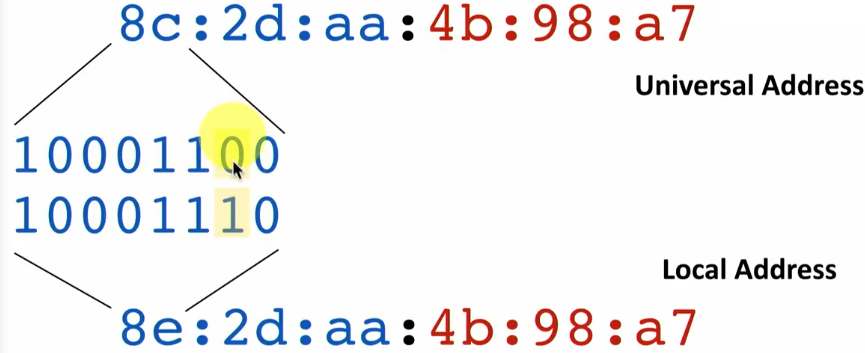

Building this IPv6 address, we need two different 64-bit halves of this address. 

The first half is going to be the subnet prefix - can easily find our subnet prefix by sending a Neighbour Discovery Protocol (NDP) to the routers that may be on our local subnet - routers will respond with the local subnet prefix. 

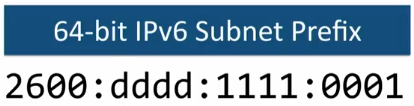

Have the subnet prefix, need the final 64-bits that are created from a combination of our modified MAC address and the ``FFFE`` that we would put in the middle.

The first three bytes (``24-bit``) would be that modified MAC address (already changed that ``0`` to a ``1`` to designate this as a locally assigned address).

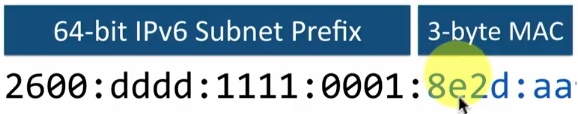

Add ``FFFE`` to the middle.

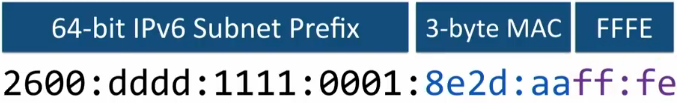

Finish with the last three bytes of the MAC address, which are unchanged.

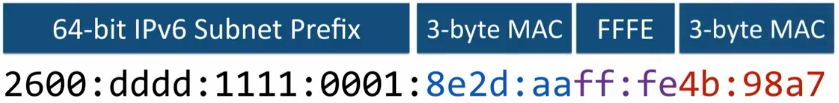

< [Table of Contents](#top) | [References](#references) >
<a id="ConvertingEUI48TOEUI64Flippingthe7thbit"></a>
***
###### Converting EUI-48 TO EUI-64 - Flipping the 7th bit
***

Converting the MAC address from a universal address to a locally assigned address, converted the MAC address from hexadecimal to binary, and then converted it back to hexadecimal again. 

A shortcut to make this process much simpler without performing any of that conversion. 

Create a chart and start at ``0`` and count all the way up to ``F`` in hexadecimal and put in these groups of four.

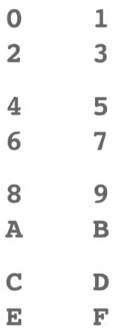

These groups of numbers and letters will be the conversions that are used to convert between a universal address and a locally assigned address. 

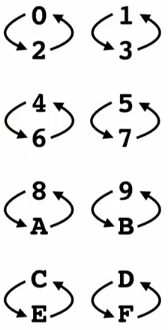

Know that MAC address started with ``8c``, and it was that second value, the ``c`` value that needed to be changed.

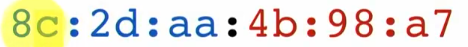

Go to chart, find the ``c`` - alternate for that is ``e``.

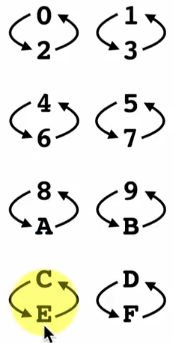

Can very quickly make this change by modifying the ``c`` and turning it into an ``e`` and writing out the rest of the MAC address. 

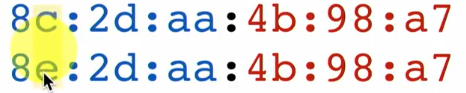

Performing the conversion between a burned-in MAC address and an ``EUI-64`` address.

Using the original MAC address and splitting it into two halves.

Starts with an ``8c``, know that we're going to change the ``c`` to the corresponding value and in our chart, that's an ``e``.

Putting in the middle ``fffe`` and the remainder of the MAC is the entire ``EUI-64``.

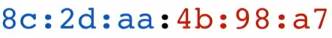
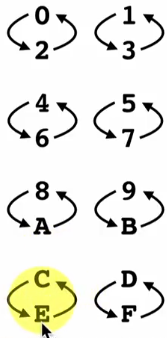
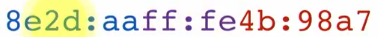

Another MAC address. 

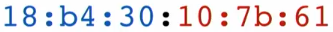

Starts with ``18``, obviously split it right in the middle.

Need to look at that second character, which is an ``8`` - look at chart, can see the corresponding value would be an ``a``.

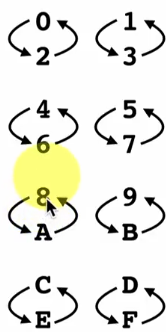

Now start with ``1a`` and split the MAC address into two, add the ``FFFE`` in the middle and then finish with the last half of the MAC address.

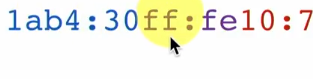

Can see the conversion process goes pretty quickly by using the conversion chart and simply converting between the MAC address and the ``EUI-64``.

Can now combine this ``EUI-64`` with the ``64-bit`` IPv6 subnet prefix for a static IPv6 address.

Don't need a DHCP server and don't need to manually configure static addresses on all of your devices - can be configured automatically using this process with IPv6.

***
## END

< [Table of Contents](#top) >
<a id="references"></a>
***
## References
***

***
## END

< [Table of Contents](#top) | [References](#references) >
<a id="appendix"></a>
***
## Appendix
***

***
## END

In [1]:
from IPython.core.display import display,HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# END JUPYTER NOTEBOOK